In [1197]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [1198]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [1199]:
Renewal_df = pd.read_csv("Renewal/DataRN1.csv",parse_dates=['Previous Funded Date', 'Current Contract Funded Date',
                                                            'Previous Contract Last Payment Date','Previous Contract Last Activity','Submitted Record Submission Date',
                                                           'Current Contract Last Payment Date','Funded Vintage'])
Renewal_df

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity
0,MC150811041,MC210324094,2021-03-26,MCR000263365,MC150811041,MCR000263365,2021-03-24 00:00:00,Funded MCR Number,New,2015-08-17,NaT,PDOFF,2016-02-23 16:52:00,PDOFF,2016-02-23 16:53:00,NaN,PDOFF,1.00,2021-03-01,61.0
1,MC160816002,MC210318069,2021-03-23,MCR000263286,MC160816002,MCR000263286,2021-03-18 00:00:00,Funded MCR Number,New,2016-09-02,2021-10-08 18:47:00,ACT,2017-04-10 16:48:00,PDOFF,2017-04-10 16:50:00,NaN,PDOFF,1.00,2021-03-01,47.0
2,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000281332,2021-08-10 17:59:00,Lost status,Renewal,2016-10-12,2021-10-07 18:46:00,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.00,2021-09-01,54.0
3,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000290203,2021-09-27 14:26:00,Funded MCR Number,New,2016-10-12,2021-10-07 18:46:00,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.00,2021-09-01,55.0
4,MC161122058,MC200713136,2020-07-15,MCR000056008,MC161122058,MCR000056008,2020-07-13 00:00:00,Funded MCR Number,New,2016-11-28,2021-04-19 18:34:00,PDOFF,2017-07-26 11:26:00,BUYOUT,2017-07-20 11:06:00,NaN,BUYOUT,1.00,2020-07-01,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,MC210729014,MC211008002,2021-10-08,MCR000292156,MC210729014,MCR000292156,2021-10-07 13:57:00,Funded MCR Number,Renewal,2021-07-29,NaT,ACT,NaT,PDOFF,2021-10-07 19:00:00,10/5/2021 18:15,ACT,0.39,2021-10-01,0.0
2360,MC210806020,MC210811023,2021-08-11,MCR000281528,MC210806020,MCR000280723,2021-08-06 15:01:00,Lost status,New,2021-08-06,2021-10-08 18:47:00,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:02:00,10/6/2021 18:36,ACT,0.00,2021-08-01,-2.0
2361,MC210813011,MC211007015,2021-10-07,MCR000292070,MC210813011,MCR000291024,2021-09-30 20:12:00,Lost status,New,2021-08-13,2021-10-08 18:47:00,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:03:00,10/6/2021 18:36,ACT,0.26,2021-10-01,0.0
2362,MC210831018,MC210909007,2021-09-09,MCR000286708,MC210831018,MCR000285274,2021-08-31 15:23:00,Lost status,Renewal,2021-08-31,2021-10-08 18:47:00,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:06:00,10/6/2021 18:36,ACT,0.00,2021-09-01,-1.0


In [1200]:
Renewal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   cs_app_no                               2364 non-null   object        
 1   Current Contract Number                 2364 non-null   object        
 2   Current Contract Funded Date            2364 non-null   datetime64[ns]
 3   Current Contract MCR#                   2364 non-null   object        
 4   Previous Contract Number                2364 non-null   object        
 5   Submitted MCR#                          2364 non-null   object        
 6   Submitted Record Submission Date        2364 non-null   datetime64[ns]
 7   Submission_Status                       2364 non-null   object        
 8   Submission_App_Type                     2364 non-null   object        
 9   Previous Funded Date                    2364 non-nul

In [1201]:
Renewal_df.isnull().sum()

cs_app_no                                    0
Current Contract Number                      0
Current Contract Funded Date                 0
Current Contract MCR#                        0
Previous Contract Number                     0
Submitted MCR#                               0
Submitted Record Submission Date             0
Submission_Status                            0
Submission_App_Type                          0
Previous Funded Date                         0
Current Contract Last Payment Date         766
Current_Contract_Account_Status              0
Previous Contract Last Payment Date       1610
Previous_Contract_Account_Status             0
Previous Contract Last Activity              3
Previous Contract Lasy Cleared Payment       8
Account_Status_at_Submission                 0
Paid_at_Submission                           0
Funded Vintage                               0
Month_Funded_to_Last_Activity                3
dtype: int64

In [1202]:
Renewal_df.groupby('Previous Contract Number').size()

Previous Contract Number
MC150811041    1
MC160816002    1
MC160919082    2
MC161122058    1
MC170118024    1
              ..
MC210729014    1
MC210806020    1
MC210813011    1
MC210831018    1
MC210910017    1
Length: 2061, dtype: int64

In [1203]:
Paidrate = (sum(Renewal_df["Paid_at_Submission"])/len(Renewal_df['Paid_at_Submission'].index))*100
Paidrate 

66.15482233502543

In [1204]:
#Renewal_df.groupby('Submitted MCR#').sum()

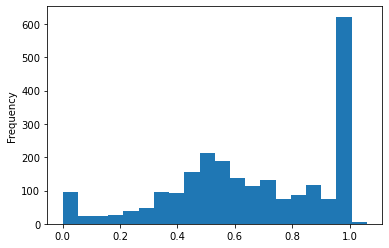

In [1205]:
ax = Renewal_df['Paid_at_Submission'].plot.hist(bins=20)

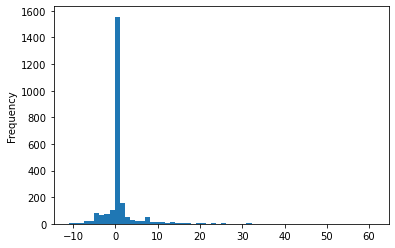

In [1206]:
ax = Renewal_df['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [1207]:
Renewal_df['Difference'] = (Renewal_df['Submitted Record Submission Date']- Renewal_df['Previous Contract Last Activity']).dt.days

In [1208]:
Renewal_df

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
0,MC150811041,MC210324094,2021-03-26,MCR000263365,MC150811041,MCR000263365,2021-03-24 00:00:00,Funded MCR Number,New,2015-08-17,...,PDOFF,2016-02-23 16:52:00,PDOFF,2016-02-23 16:53:00,NaN,PDOFF,1.00,2021-03-01,61.0,1855.0
1,MC160816002,MC210318069,2021-03-23,MCR000263286,MC160816002,MCR000263286,2021-03-18 00:00:00,Funded MCR Number,New,2016-09-02,...,ACT,2017-04-10 16:48:00,PDOFF,2017-04-10 16:50:00,NaN,PDOFF,1.00,2021-03-01,47.0,1437.0
2,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000281332,2021-08-10 17:59:00,Lost status,Renewal,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.00,2021-09-01,54.0,1643.0
3,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000290203,2021-09-27 14:26:00,Funded MCR Number,New,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.00,2021-09-01,55.0,1690.0
4,MC161122058,MC200713136,2020-07-15,MCR000056008,MC161122058,MCR000056008,2020-07-13 00:00:00,Funded MCR Number,New,2016-11-28,...,PDOFF,2017-07-26 11:26:00,BUYOUT,2017-07-20 11:06:00,NaN,BUYOUT,1.00,2020-07-01,35.0,1088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,MC210729014,MC211008002,2021-10-08,MCR000292156,MC210729014,MCR000292156,2021-10-07 13:57:00,Funded MCR Number,Renewal,2021-07-29,...,ACT,NaT,PDOFF,2021-10-07 19:00:00,10/5/2021 18:15,ACT,0.39,2021-10-01,0.0,-1.0
2360,MC210806020,MC210811023,2021-08-11,MCR000281528,MC210806020,MCR000280723,2021-08-06 15:01:00,Lost status,New,2021-08-06,...,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:02:00,10/6/2021 18:36,ACT,0.00,2021-08-01,-2.0,-64.0
2361,MC210813011,MC211007015,2021-10-07,MCR000292070,MC210813011,MCR000291024,2021-09-30 20:12:00,Lost status,New,2021-08-13,...,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:03:00,10/6/2021 18:36,ACT,0.26,2021-10-01,0.0,-8.0
2362,MC210831018,MC210909007,2021-09-09,MCR000286708,MC210831018,MCR000285274,2021-08-31 15:23:00,Lost status,Renewal,2021-08-31,...,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:06:00,10/6/2021 18:36,ACT,0.00,2021-09-01,-1.0,-39.0


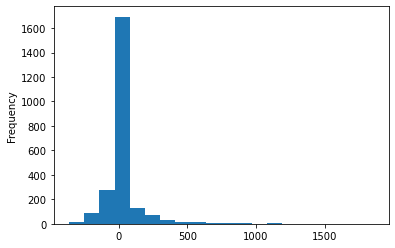

In [1209]:
ax = Renewal_df['Difference'].plot.hist(bins=20)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'PDOFF'),
  Text(1, 0, 'ACT'),
  Text(2, 0, 'WROFF'),
  Text(3, 0, 'BUYOUT'),
  Text(4, 0, 'SETT'),
  Text(5, 0, 'DEF'),
  Text(6, 0, 'OVRPD')])

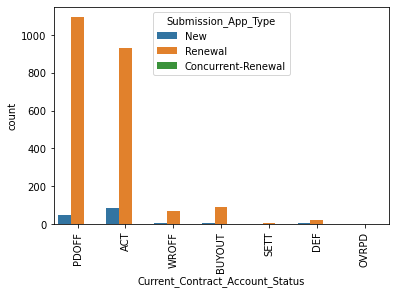

In [1210]:
sns.countplot(x = "Current_Contract_Account_Status", hue = "Submission_App_Type", data = Renewal_df)
xticks(rotation = 90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'PDOFF'),
  Text(1, 0, 'BUYOUT'),
  Text(2, 0, 'ACT'),
  Text(3, 0, 'OVRPD')])

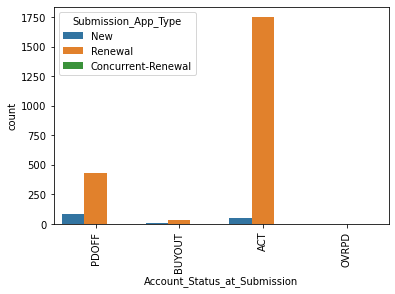

In [1211]:
sns.countplot(x = "Account_Status_at_Submission", hue = "Submission_App_Type", data = Renewal_df)
xticks(rotation = 90)

In [1212]:
Ren_Count_Data = Renewal_df.groupby('Paid_at_Submission').size().reset_index(name='Count')
Ren_Count_Data

,Paid_at_Submission,Count
0,0.00,80
1,0.01,2
2,0.02,3
3,0.03,2
4,0.04,5
...,...,...
99,0.99,11
100,1.00,569
101,1.01,2
102,1.04,1


In [1213]:
Ren_mask = (Renewal_df.Paid_at_Submission < 1) & (Renewal_df.Submission_App_Type == "Renewal")

RN_filtered4= Renewal_df[Ren_mask]
RN_filtered4

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
95,MC190711105,MC200720106,2020-07-24,MCR000187724,MC190711105,MCR000187724,2020-07-20 00:00:00,Funded MCR Number,Renewal,2019-07-12,...,PDOFF,NaT,PDOFF,2020-07-23 19:17:00,7/21/2020 18:41,ACT,0.96,2020-07-01,0.0,-4.0
106,MC190731205,MC200813107,2020-09-01,MCR000056079,MC190731205,MCR000056079,2020-08-13 00:00:00,Funded MCR Number,Renewal,2019-08-05,...,PDOFF,NaT,PDOFF,2020-08-31 19:05:00,8/27/2020 18:40,ACT,0.93,2020-09-01,0.0,-19.0
112,MC190805189,MC201117014,2020-11-20,MCR000259227,MC190805189,MCR000259227,2020-11-16 00:00:00,Funded MCR Number,Renewal,2019-09-30,...,PDOFF,NaT,PDOFF,2020-11-20 09:46:00,11/17/2020 9:48,ACT,0.94,2020-11-01,0.0,-5.0
113,MC190805189,MC201117014,2020-11-20,MCR000259227,MC190805189,MCR000141644,2020-08-06 07:00:00,Lost status,Renewal,2019-09-30,...,PDOFF,NaT,PDOFF,2020-11-20 09:46:00,11/17/2020 9:48,ACT,0.66,2020-11-01,-3.0,-107.0
122,MC190809167,MC200506130,2020-05-07,MCR000219943,MC190809167,MCR000219943,2020-05-06 07:00:00,Funded MCR Number,Renewal,2019-08-13,...,PDOFF,NaT,PDOFF,2020-05-06 18:38:00,5/4/2020 18:40,ACT,0.97,2020-05-01,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,MC210727022,MC211008021,2021-10-08,MCR000292345,MC210727022,MCR000292345,2021-10-07 21:23:00,Funded MCR Number,Renewal,2021-07-27,...,ACT,NaT,PDOFF,2021-10-07 18:59:00,10/5/2021 18:15,ACT,0.40,2021-10-01,0.0,0.0
2357,MC210728014,MC211005001,2021-10-05,MCR000290200,MC210728014,MCR000290200,2021-09-27 14:24:00,Funded MCR Number,Renewal,2021-07-28,...,ACT,NaT,PDOFF,2021-10-04 18:48:00,9/30/2021 18:41,ACT,0.33,2021-10-01,0.0,-8.0
2358,MC210728014,MC211005001,2021-10-05,MCR000290200,MC210728014,MCR000291107,2021-10-01 14:31:00,Lost status,Renewal,2021-07-28,...,ACT,NaT,PDOFF,2021-10-04 18:48:00,9/30/2021 18:41,ACT,0.37,2021-10-01,0.0,-4.0
2359,MC210729014,MC211008002,2021-10-08,MCR000292156,MC210729014,MCR000292156,2021-10-07 13:57:00,Funded MCR Number,Renewal,2021-07-29,...,ACT,NaT,PDOFF,2021-10-07 19:00:00,10/5/2021 18:15,ACT,0.39,2021-10-01,0.0,-1.0


In [1214]:
Ren_Count_Data1 = RN_filtered4.groupby('Paid_at_Submission').size().reset_index(name='Count')
Ren_Count_Data1

,Paid_at_Submission,Count
0,0.00,63
1,0.01,2
2,0.02,3
3,0.04,4
4,0.05,4
...,...,...
94,0.95,17
95,0.96,17
96,0.97,13
97,0.98,12


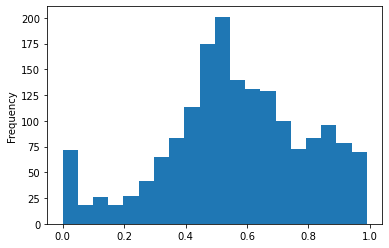

In [1215]:
ax = RN_filtered4['Paid_at_Submission'].plot.hist(bins=20)

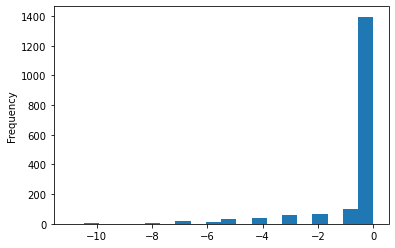

In [1216]:
ax = RN_filtered4['Month_Funded_to_Last_Activity'].plot.hist(bins=20)

In [1217]:
Ren_Count_Data4 = RN_filtered4.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data4

,Month_Funded_to_Last_Activity,Count
0,-11.0,2
1,-10.0,3
2,-9.0,2
3,-8.0,7
4,-7.0,16
5,-6.0,14
6,-5.0,32
7,-4.0,40
8,-3.0,60
9,-2.0,66


In [1218]:
#%matplotlib inline
#plt.pie(Ren_Count_Data1.Count, labels = Ren_Count_Data1.Paid_at_Submission, 
       # shadow=True, autopct='%1.1f%%', radius=1.5);

In [1219]:
Ren_mask = (Renewal_df.Paid_at_Submission >= 1) & (Renewal_df.Submission_App_Type == "Renewal")

RN_filtered2= Renewal_df[Ren_mask]
RN_filtered2

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
2,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000281332,2021-08-10 17:59:00,Lost status,Renewal,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.0,2021-09-01,54.0,1643.0
5,MC170118024,MC200817109,2020-08-31,MCR000141027,MC170118024,MCR000141027,2020-08-17 00:00:00,Funded MCR Number,Renewal,2017-01-23,...,PDOFF,2017-11-21 16:52:00,PDOFF,2017-11-21 16:52:00,NaN,PDOFF,1.0,2020-08-01,32.0,999.0
6,MC170614157,MC200806195,2020-08-17,MCR000141643,MC170614157,MCR000141643,2020-08-06 07:00:00,Funded MCR Number,Renewal,2017-06-16,...,WROFF,2018-06-19 16:43:00,PDOFF,2018-06-19 16:43:00,6/14/2018 16:56,PDOFF,1.0,2020-08-01,25.0,778.0
10,MC170927084,MC210921017,2021-09-21,MCR000288838,MC170927084,MCR000288838,2021-09-17 19:05:00,Funded MCR Number,Renewal,2017-09-28,...,ACT,2018-07-02 16:56:00,PDOFF,2018-07-02 16:59:00,6/27/2018 16:48,PDOFF,1.0,2021-09-01,38.0,1173.0
11,MC171016071,MC201216216,2020-12-22,MCR000262893,MC171016071,MCR000262893,2020-12-16 00:00:00,Funded MCR Number,Renewal,2017-10-19,...,BUYOUT,2018-01-16 09:32:00,BUYOUT,2018-01-16 09:32:00,NaN,BUYOUT,1.0,2020-12-01,35.0,1064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,MC210310143,MC211005007,2021-10-05,MCR000291403,MC210310143,MCR000291403,2021-10-04 16:55:00,Funded MCR Number,Renewal,2021-03-10,...,ACT,2021-08-02 18:37:00,PDOFF,2021-08-02 19:02:00,7/28/2021 18:39,PDOFF,1.0,2021-10-01,2.0,62.0
2229,MC210413095,MC210729016,2021-07-29,MCR000279019,MC210413095,MCR000279019,2021-07-28 20:09:00,Funded MCR Number,Renewal,2021-04-13,...,ACT,2021-06-08 17:22:00,BUYOUT,2021-06-08 17:22:00,6/3/2021 18:34,BUYOUT,1.0,2021-07-01,1.0,50.0
2252,MC210427007,MC210728003,2021-07-28,MCR000278681,MC210427007,MCR000278681,2021-07-27 17:17:00,Funded MCR Number,Renewal,2021-04-27,...,ACT,2021-07-27 17:16:00,BUYOUT,2021-07-27 17:16:00,7/22/2021 18:36,BUYOUT,1.0,2021-07-01,0.0,0.0
2282,MC210505140,MC210729018,2021-07-29,MCR000277799,MC210505140,MCR000277799,2021-07-22 14:07:00,Funded MCR Number,Renewal,2021-05-06,...,ACT,2021-07-14 10:03:00,BUYOUT,2021-07-14 10:03:00,7/2/2021 18:32,BUYOUT,1.0,2021-07-01,0.0,8.0


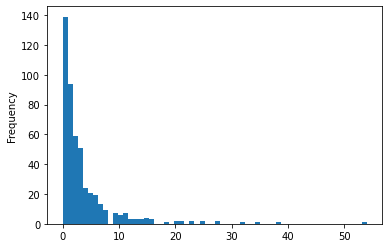

In [1220]:
ax = RN_filtered2['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [1221]:
Ren_Count_Data2 = RN_filtered2.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data2

,Month_Funded_to_Last_Activity,Count
0,0.0,139
1,1.0,94
2,2.0,59
3,3.0,51
4,4.0,24
5,5.0,21
6,6.0,19
7,7.0,13
8,8.0,9
9,9.0,7


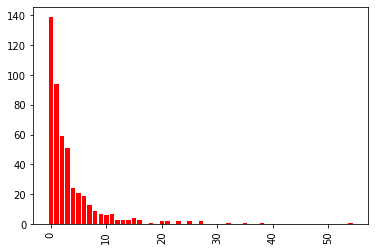

In [1222]:
%matplotlib inline
plt.bar(Ren_Count_Data2.Month_Funded_to_Last_Activity, Ren_Count_Data2.Count, color='red')
plt.xticks(rotation=90);

In [1223]:
percentage = []
total_count = Ren_Count_Data2.Count.sum()

for i in range(Ren_Count_Data2.shape[0]):
    pct = (Ren_Count_Data2.Count[i] / total_count) * 100
    percentage.append(round(pct, 2))
 
# display percentage
print(percentage)
 
# display data
Ren_Count_Data2['Percentage'] = percentage
display(Ren_Count_Data2)

[28.96, 19.58, 12.29, 10.62, 5.0, 4.38, 3.96, 2.71, 1.88, 1.46, 1.25, 1.46, 0.62, 0.62, 0.62, 0.83, 0.62, 0.21, 0.42, 0.42, 0.42, 0.42, 0.42, 0.21, 0.21, 0.21, 0.21]


,Month_Funded_to_Last_Activity,Count,Percentage
0,0.0,139,28.96
1,1.0,94,19.58
2,2.0,59,12.29
3,3.0,51,10.62
4,4.0,24,5.00
5,5.0,21,4.38
6,6.0,19,3.96
7,7.0,13,2.71
8,8.0,9,1.88
9,9.0,7,1.46


In [1224]:
#Ren_Count_Data2['Percentage'] = Ren_Count_Data2['Count']

#Ren_Count_Data2['Percentage'] = 100*Ren_Count_Data2['Percentage']/(sum(Ren_Count_Data2['Percentage']))
#Ren_Count_Data2 = Ren_Count_Data2.drop('Count%',axis = 1)

#Ren_Count_Data2.head()

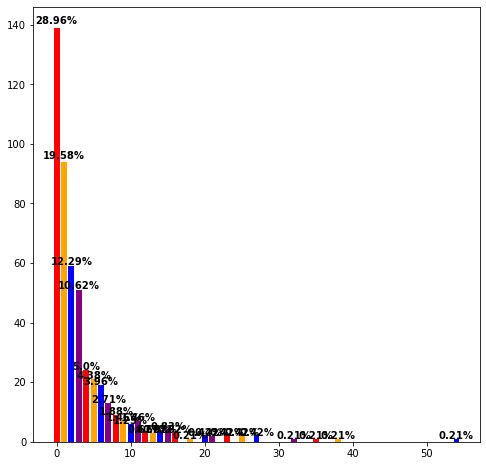

In [1225]:
plt.figure(figsize=(8, 8))
colors_list = ['Red', 'Orange', 'Blue', 'Purple']
graph = plt.bar(Ren_Count_Data2.Month_Funded_to_Last_Activity, Ren_Count_Data2.Count, color=colors_list)

#plt.title('Percentage')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(Ren_Count_Data2.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()

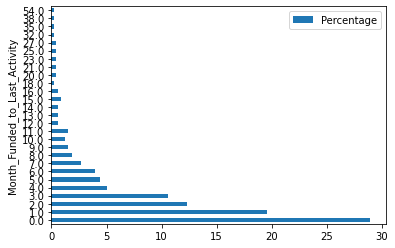

In [1226]:
ax = Ren_Count_Data2.plot.barh(x='Month_Funded_to_Last_Activity', y='Percentage')

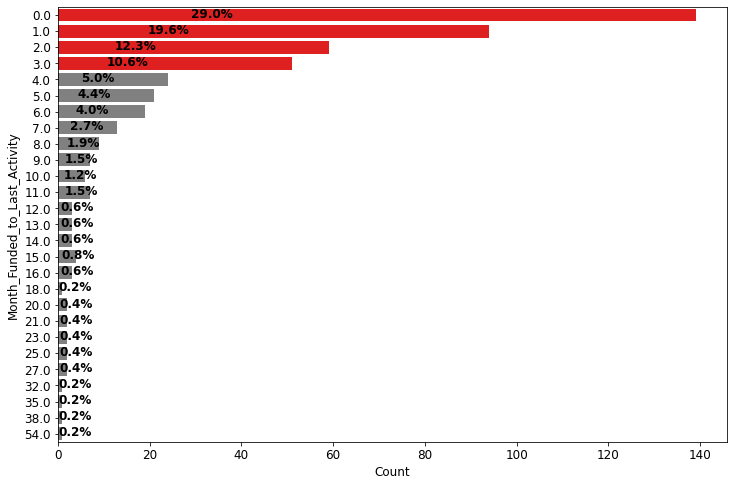

In [1227]:
x= Ren_Count_Data2['Count']
y= Ren_Count_Data2['Month_Funded_to_Last_Activity']

plt.figure(figsize=(12,8))
#Ren_Count_Data2 = Ren_Count_Data2.iloc[:,[0,2]]
df = Ren_Count_Data2.groupby('Count').sum().sort_values("Month_Funded_to_Last_Activity", ascending=False)
data = df.reset_index().iloc[:,[0,2]]
data.columns = ['Month_Funded_to_Last_Activity', 'Count']
data = Ren_Count_Data2

clrs = ['red' if (x > 10) else 'gray' for x in Ren_Count_Data2['Percentage']]
ax = sns.barplot(x,y, data=Ren_Count_Data2, orient = 'h', palette=clrs)
ax.set_xlabel('Count',fontsize=12)
ax.set_ylabel('Month_Funded_to_Last_Activity',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(Ren_Count_Data2['Percentage']):
    ax.text(v + 0, i + 0.15, str("{0:.1f}%".format(v)), color='black', fontweight='bold', fontsize=12)

In [1228]:
#RN_filtered2['Month_Funded_to_Last_Activity'].value_counts()[:20].plot(kind='barh')

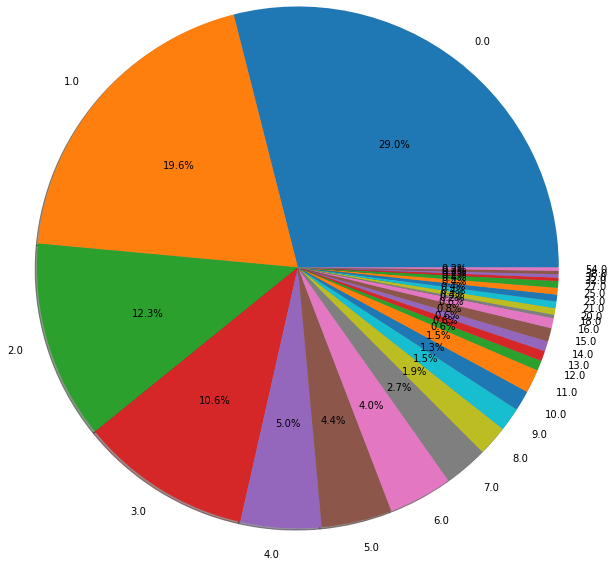

In [1229]:
%matplotlib inline
plt.pie(Ren_Count_Data2.Count, labels = Ren_Count_Data2.Month_Funded_to_Last_Activity, 
       shadow=True, autopct='%1.1f%%', radius=3);

In [1230]:
Ren_mask = (Renewal_df.Paid_at_Submission >= 1) & (Renewal_df.Submission_App_Type == "New")

RN_filtered8= Renewal_df[Ren_mask]
RN_filtered8

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
0,MC150811041,MC210324094,2021-03-26,MCR000263365,MC150811041,MCR000263365,2021-03-24 00:00:00,Funded MCR Number,New,2015-08-17,...,PDOFF,2016-02-23 16:52:00,PDOFF,2016-02-23 16:53:00,NaN,PDOFF,1.0,2021-03-01,61.0,1855.0
1,MC160816002,MC210318069,2021-03-23,MCR000263286,MC160816002,MCR000263286,2021-03-18 00:00:00,Funded MCR Number,New,2016-09-02,...,ACT,2017-04-10 16:48:00,PDOFF,2017-04-10 16:50:00,NaN,PDOFF,1.0,2021-03-01,47.0,1437.0
3,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000290203,2021-09-27 14:26:00,Funded MCR Number,New,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.0,2021-09-01,55.0,1690.0
4,MC161122058,MC200713136,2020-07-15,MCR000056008,MC161122058,MCR000056008,2020-07-13 00:00:00,Funded MCR Number,New,2016-11-28,...,PDOFF,2017-07-26 11:26:00,BUYOUT,2017-07-20 11:06:00,NaN,BUYOUT,1.0,2020-07-01,35.0,1088.0
7,MC170801077,MC200626003,2020-06-29,MCR000156680,MC170801077,MCR000156680,2020-06-24 07:00:00,Funded MCR Number,New,2017-08-04,...,PDOFF,2018-08-08 16:49:00,PDOFF,2018-08-08 16:49:00,8/3/2018 16:55,PDOFF,1.0,2020-06-01,22.0,685.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,MC201009108,MC210820006,2021-08-20,MCR000282876,MC201009108,MCR000282860,2021-08-18 16:32:00,Lost status,New,2020-10-12,...,ACT,2021-07-15 18:41:00,PDOFF,2021-07-15 18:42:00,7/12/2021 18:34,PDOFF,1.0,2021-08-01,1.0,33.0
1576,MC201021095,MC210825004,2021-08-25,MCR000284056,MC201021095,MCR000283917,2021-08-24 15:35:00,Lost status,New,2020-10-21,...,ACT,2021-04-09 18:34:00,PDOFF,2021-04-09 18:55:00,4/6/2021 18:34,PDOFF,1.0,2021-08-01,4.0,136.0
1627,MC201103025,MC210614003,2021-06-14,MCR000270334,MC201103025,MCR000270334,2021-06-10 17:10:00,Funded MCR Number,New,2020-11-03,...,ACT,2021-06-07 18:41:00,PDOFF,2021-06-07 18:45:00,6/2/2021 18:34,PDOFF,1.0,2021-06-01,0.0,2.0
1673,MC201110054,MC210812003,2021-08-12,MCR000281577,MC201110054,MCR000281577,2021-08-11 17:43:00,Funded MCR Number,New,2020-12-01,...,ACT,2021-04-05 18:34:00,PDOFF,2021-04-05 18:43:00,3/31/2021 18:30,PDOFF,1.0,2021-08-01,4.0,127.0


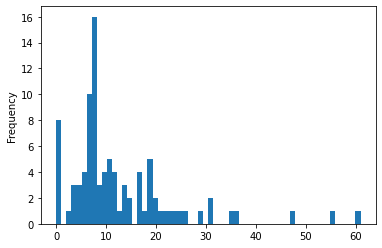

In [1231]:
ax = RN_filtered8['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

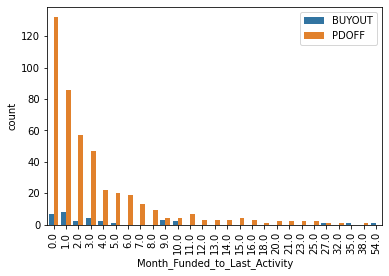

In [1232]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Previous_Contract_Account_Status", data = RN_filtered2)
xticks(rotation = 90)
plt.legend(loc='upper right')

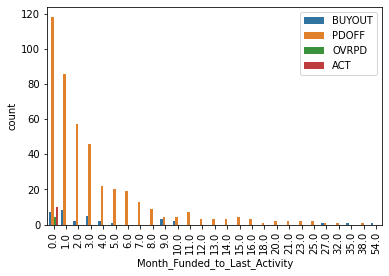

In [1233]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Account_Status_at_Submission", data = RN_filtered2)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [1234]:
#plt.figure(figsize=(8,6))
#sns.scatterplot("Requested_Amount","Lead_Score", hue="Is_Submitted", data=Lead_filtered, s=50)
#plt.show()

In [1235]:
Ren_mask = (Renewal_df.Paid_at_Submission == 1) 

RN_filtered5= Renewal_df[Ren_mask]
RN_filtered5

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
0,MC150811041,MC210324094,2021-03-26,MCR000263365,MC150811041,MCR000263365,2021-03-24 00:00:00,Funded MCR Number,New,2015-08-17,...,PDOFF,2016-02-23 16:52:00,PDOFF,2016-02-23 16:53:00,NaN,PDOFF,1.0,2021-03-01,61.0,1855.0
1,MC160816002,MC210318069,2021-03-23,MCR000263286,MC160816002,MCR000263286,2021-03-18 00:00:00,Funded MCR Number,New,2016-09-02,...,ACT,2017-04-10 16:48:00,PDOFF,2017-04-10 16:50:00,NaN,PDOFF,1.0,2021-03-01,47.0,1437.0
2,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000281332,2021-08-10 17:59:00,Lost status,Renewal,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.0,2021-09-01,54.0,1643.0
3,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000290203,2021-09-27 14:26:00,Funded MCR Number,New,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.0,2021-09-01,55.0,1690.0
4,MC161122058,MC200713136,2020-07-15,MCR000056008,MC161122058,MCR000056008,2020-07-13 00:00:00,Funded MCR Number,New,2016-11-28,...,PDOFF,2017-07-26 11:26:00,BUYOUT,2017-07-20 11:06:00,NaN,BUYOUT,1.0,2020-07-01,35.0,1088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,MC210310143,MC211005007,2021-10-05,MCR000291403,MC210310143,MCR000291403,2021-10-04 16:55:00,Funded MCR Number,Renewal,2021-03-10,...,ACT,2021-08-02 18:37:00,PDOFF,2021-08-02 19:02:00,7/28/2021 18:39,PDOFF,1.0,2021-10-01,2.0,62.0
2229,MC210413095,MC210729016,2021-07-29,MCR000279019,MC210413095,MCR000279019,2021-07-28 20:09:00,Funded MCR Number,Renewal,2021-04-13,...,ACT,2021-06-08 17:22:00,BUYOUT,2021-06-08 17:22:00,6/3/2021 18:34,BUYOUT,1.0,2021-07-01,1.0,50.0
2252,MC210427007,MC210728003,2021-07-28,MCR000278681,MC210427007,MCR000278681,2021-07-27 17:17:00,Funded MCR Number,Renewal,2021-04-27,...,ACT,2021-07-27 17:16:00,BUYOUT,2021-07-27 17:16:00,7/22/2021 18:36,BUYOUT,1.0,2021-07-01,0.0,0.0
2282,MC210505140,MC210729018,2021-07-29,MCR000277799,MC210505140,MCR000277799,2021-07-22 14:07:00,Funded MCR Number,Renewal,2021-05-06,...,ACT,2021-07-14 10:03:00,BUYOUT,2021-07-14 10:03:00,7/2/2021 18:32,BUYOUT,1.0,2021-07-01,0.0,8.0


In [1236]:
Paidrate = (sum(RN_filtered5["Paid_at_Submission"])/len(Renewal_df['Paid_at_Submission'].index))*100
Paidrate 

24.06937394247039

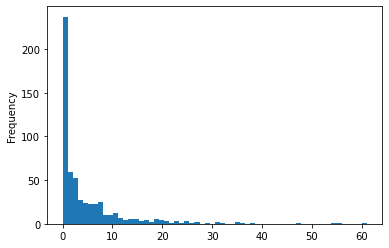

In [1237]:
ax = RN_filtered5['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

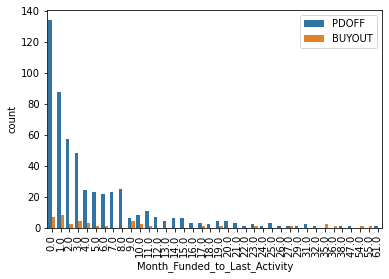

In [1238]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Previous_Contract_Account_Status", data = RN_filtered5)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [1239]:
Sub_status = Renewal_df[Renewal_df['Submission_Status']=='Funded MCR Number'].count()
Sub_status

cs_app_no                                 2015
Current Contract Number                   2015
Current Contract Funded Date              2015
Current Contract MCR#                     2015
Previous Contract Number                  2015
Submitted MCR#                            2015
Submitted Record Submission Date          2015
Submission_Status                         2015
Submission_App_Type                       2015
Previous Funded Date                      2015
Current Contract Last Payment Date        1338
Current_Contract_Account_Status           2015
Previous Contract Last Payment Date        612
Previous_Contract_Account_Status          2015
Previous Contract Last Activity           2012
Previous Contract Lasy Cleared Payment    2008
Account_Status_at_Submission              2015
Paid_at_Submission                        2015
Funded Vintage                            2015
Month_Funded_to_Last_Activity             2012
Difference                                2012
dtype: int64

In [1240]:
Ren_mask = (Renewal_df.Submission_Status == 'Funded MCR Number')

RN_filtered3= Renewal_df[Ren_mask]
RN_filtered3

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
0,MC150811041,MC210324094,2021-03-26,MCR000263365,MC150811041,MCR000263365,2021-03-24 00:00:00,Funded MCR Number,New,2015-08-17,...,PDOFF,2016-02-23 16:52:00,PDOFF,2016-02-23 16:53:00,NaN,PDOFF,1.00,2021-03-01,61.0,1855.0
1,MC160816002,MC210318069,2021-03-23,MCR000263286,MC160816002,MCR000263286,2021-03-18 00:00:00,Funded MCR Number,New,2016-09-02,...,ACT,2017-04-10 16:48:00,PDOFF,2017-04-10 16:50:00,NaN,PDOFF,1.00,2021-03-01,47.0,1437.0
3,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000290203,2021-09-27 14:26:00,Funded MCR Number,New,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.00,2021-09-01,55.0,1690.0
4,MC161122058,MC200713136,2020-07-15,MCR000056008,MC161122058,MCR000056008,2020-07-13 00:00:00,Funded MCR Number,New,2016-11-28,...,PDOFF,2017-07-26 11:26:00,BUYOUT,2017-07-20 11:06:00,NaN,BUYOUT,1.00,2020-07-01,35.0,1088.0
5,MC170118024,MC200817109,2020-08-31,MCR000141027,MC170118024,MCR000141027,2020-08-17 00:00:00,Funded MCR Number,Renewal,2017-01-23,...,PDOFF,2017-11-21 16:52:00,PDOFF,2017-11-21 16:52:00,NaN,PDOFF,1.00,2020-08-01,32.0,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,MC210716025,MC211007005,2021-10-07,MCR000291711,MC210716025,MCR000291711,2021-10-05 18:14:00,Funded MCR Number,Renewal,2021-07-19,...,ACT,NaT,PDOFF,2021-10-06 18:48:00,10/4/2021 18:33,ACT,0.44,2021-10-01,0.0,-2.0
2354,MC210720016,MC211008018,2021-10-08,MCR000292352,MC210720016,MCR000292352,2021-10-07 21:40:00,Funded MCR Number,Renewal,2021-07-20,...,ACT,NaT,PDOFF,2021-10-07 18:59:00,10/5/2021 18:15,ACT,0.22,2021-10-01,0.0,0.0
2355,MC210727022,MC211008021,2021-10-08,MCR000292345,MC210727022,MCR000292345,2021-10-07 21:23:00,Funded MCR Number,Renewal,2021-07-27,...,ACT,NaT,PDOFF,2021-10-07 18:59:00,10/5/2021 18:15,ACT,0.40,2021-10-01,0.0,0.0
2357,MC210728014,MC211005001,2021-10-05,MCR000290200,MC210728014,MCR000290200,2021-09-27 14:24:00,Funded MCR Number,Renewal,2021-07-28,...,ACT,NaT,PDOFF,2021-10-04 18:48:00,9/30/2021 18:41,ACT,0.33,2021-10-01,0.0,-8.0


In [1241]:
len(RN_filtered3['Previous Contract Number'].unique().tolist())

2009

In [1242]:
Ren_mask = (Renewal_df.Submission_Status == "Lost status") 

RN_filtered= Renewal_df[Ren_mask]
RN_filtered

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
2,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000281332,2021-08-10 17:59:00,Lost status,Renewal,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.00,2021-09-01,54.0,1643.0
9,MC170927084,MC210921017,2021-09-21,MCR000288838,MC170927084,MCR000254430,2021-02-09 16:57:00,Lost status,New,2017-09-28,...,ACT,2018-07-02 16:56:00,PDOFF,2018-07-02 16:59:00,6/27/2018 16:48,PDOFF,1.00,2021-09-01,31.0,952.0
23,MC180625040,MC201030027,2020-10-30,MCR000262922,MC180625040,MCR000242859,2020-10-01 19:41:00,Lost status,Renewal,2018-06-27,...,SETT,2018-12-10 16:43:00,PDOFF,2018-12-10 17:26:00,12/5/2018 16:46,PDOFF,1.00,2020-10-01,21.0,661.0
24,MC180625040,MC201030027,2020-10-30,MCR000262922,MC180625040,MCR000243147,2020-10-02 15:48:00,Lost status,New,2018-06-27,...,SETT,2018-12-10 16:43:00,PDOFF,2018-12-10 17:26:00,12/5/2018 16:46,PDOFF,1.00,2020-10-01,21.0,661.0
39,MC181126033,MC210122097,2021-01-22,MCR000252730,MC181126033,MCR000259136,2021-01-15 00:00:00,Lost status,Renewal,2018-12-03,...,ACT,2019-11-04 18:46:00,PDOFF,2019-11-04 18:47:00,10/30/2019 18:49,PDOFF,1.00,2021-01-01,14.0,437.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,MC210728014,MC211005001,2021-10-05,MCR000290200,MC210728014,MCR000291107,2021-10-01 14:31:00,Lost status,Renewal,2021-07-28,...,ACT,NaT,PDOFF,2021-10-04 18:48:00,9/30/2021 18:41,ACT,0.37,2021-10-01,0.0,-4.0
2360,MC210806020,MC210811023,2021-08-11,MCR000281528,MC210806020,MCR000280723,2021-08-06 15:01:00,Lost status,New,2021-08-06,...,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:02:00,10/6/2021 18:36,ACT,0.00,2021-08-01,-2.0,-64.0
2361,MC210813011,MC211007015,2021-10-07,MCR000292070,MC210813011,MCR000291024,2021-09-30 20:12:00,Lost status,New,2021-08-13,...,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:03:00,10/6/2021 18:36,ACT,0.26,2021-10-01,0.0,-8.0
2362,MC210831018,MC210909007,2021-09-09,MCR000286708,MC210831018,MCR000285274,2021-08-31 15:23:00,Lost status,Renewal,2021-08-31,...,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:06:00,10/6/2021 18:36,ACT,0.00,2021-09-01,-1.0,-39.0


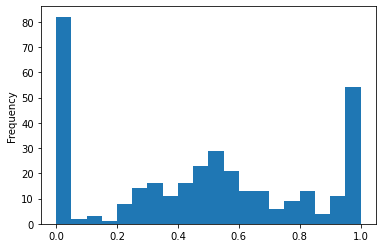

In [1243]:
ax = RN_filtered['Paid_at_Submission'].plot.hist(bins=20)

In [1244]:
#Paidrate = (sum(RN_filtered["Paid_at_Submission"])/len(Renewal_df['Paid_at_Submission'].index))*100
#Paidrate 

In [1245]:
Ren_Count_Data3 = RN_filtered.groupby('Paid_at_Submission').size().reset_index(name='Count')
Ren_Count_Data3.sample(20)

,Paid_at_Submission,Count
49,0.65,1
56,0.76,3
13,0.26,5
72,0.96,1
36,0.51,7
23,0.38,3
15,0.29,5
65,0.85,1
39,0.54,2
51,0.68,2


In [1246]:
percentage = []
total_count = Ren_Count_Data3.Count.sum()

for i in range(Ren_Count_Data3.shape[0]):
    pct = (Ren_Count_Data3.Count[i] / total_count) * 100
    percentage.append(round(pct, 2))
 
# display percentage
print(percentage)
 
# display data
Ren_Count_Data3['Percentage'] = percentage
Ren_Count_Data3.head(20)

[22.92, 0.57, 0.29, 0.29, 0.57, 0.29, 0.29, 0.29, 0.29, 0.29, 0.86, 0.57, 0.29, 1.43, 0.86, 1.43, 1.15, 0.86, 0.57, 0.57, 1.43, 0.86, 0.86, 0.86, 0.57, 0.86, 0.86, 0.57, 0.86, 1.43, 0.86, 1.72, 1.43, 1.43, 1.15, 1.43, 2.01, 2.87, 1.43, 0.57, 2.29, 1.15, 1.15, 0.57, 0.86, 1.43, 0.86, 1.15, 0.29, 0.29, 1.15, 0.57, 0.86, 0.86, 0.57, 1.15, 0.86, 0.86, 0.57, 0.29, 0.29, 0.57, 0.29, 0.86, 1.43, 0.29, 0.57, 0.57, 1.15, 0.57, 0.86, 0.57, 0.29, 0.29, 0.29, 14.61]


,Paid_at_Submission,Count,Percentage
0,0.00,80,22.92
1,0.03,2,0.57
2,0.06,1,0.29
3,0.09,1,0.29
4,0.10,2,0.57
5,0.14,1,0.29
6,0.19,1,0.29
7,0.20,1,0.29
8,0.21,1,0.29
9,0.22,1,0.29


In [1247]:
df1 = Ren_Count_Data3.groupby('Count').sum().sort_values("Paid_at_Submission", ascending=True)
df1 = df1.reset_index()
df1

,Count,Paid_at_Submission,Percentage
0,80,0.00,22.92
1,6,0.46,1.72
2,7,0.51,2.01
3,10,0.52,2.87
4,8,0.55,2.29
5,51,1.00,14.61
6,5,4.77,14.30
7,4,4.85,9.20
8,1,8.84,4.93
9,3,9.52,15.48


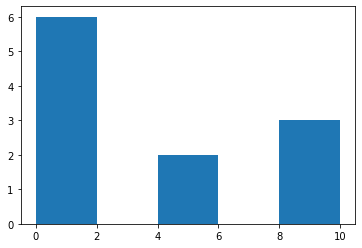

In [1298]:
plt.hist(df1['Paid_at_Submission'], bins=5, range=(0, 10))
plt.show()

In [1288]:
#pd.qcut((df1['Paid_at_Submission']),q=5).value_counts()

In [1300]:
#pd.cut(df1['Paid_at_Submission'], bins=4).value_counts().plot(kind = 'bar')

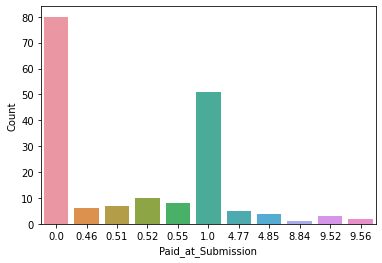

In [1248]:
ax = sns.barplot(x="Paid_at_Submission", y="Count",  data=df1)

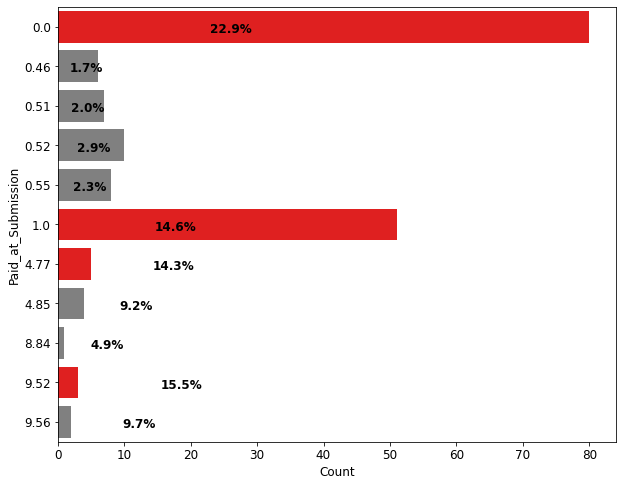

In [1249]:
x= df1['Count']
y= df1['Paid_at_Submission']

plt.figure(figsize=(10,8))
#data = df1.iloc[:,[0,2]]
#data.columns = ['Paid_at_Submission', 'Count']
clrs = ['red' if (x > 10) else 'gray' for x in df1['Percentage']]
ax = sns.barplot(x,y, data=df1, orient = 'h', palette=clrs)
ax.set_xlabel('Count',fontsize=12)
ax.set_ylabel('Paid_at_Submission',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(df1['Percentage']):
    ax.text(v + 0, i + 0.15, str("{0:.1f}%".format(v)), color='black', fontweight='bold', fontsize=12)

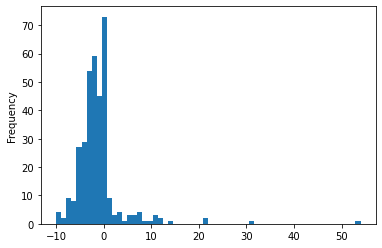

In [1250]:
ax = RN_filtered['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

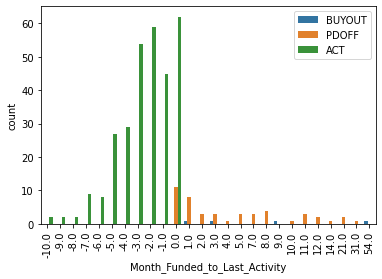

In [1251]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Account_Status_at_Submission", data = RN_filtered)
xticks(rotation = 90)
plt.legend(loc='upper right')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'ACT'),
  Text(1, 0, 'SETT'),
  Text(2, 0, 'DEF'),
  Text(3, 0, 'PDOFF'),
  Text(4, 0, 'WROFF'),
  Text(5, 0, 'BUYOUT')])

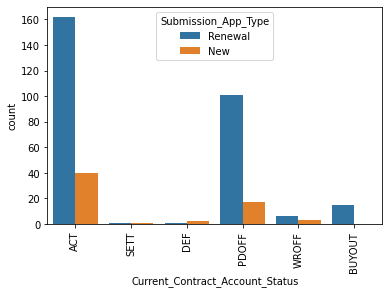

In [1252]:
sns.countplot(x = "Current_Contract_Account_Status", hue = "Submission_App_Type", data = RN_filtered)
xticks(rotation = 90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BUYOUT'),
  Text(1, 0, 'PDOFF'),
  Text(2, 0, 'WROFF'),
  Text(3, 0, 'ACT')])

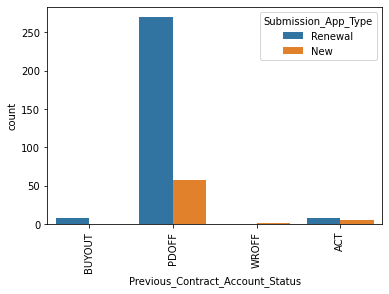

In [1253]:
sns.countplot(x = "Previous_Contract_Account_Status", hue = "Submission_App_Type", data = RN_filtered)
xticks(rotation = 90)

(array([0, 1, 2]),
 [Text(0, 0, 'BUYOUT'), Text(1, 0, 'PDOFF'), Text(2, 0, 'ACT')])

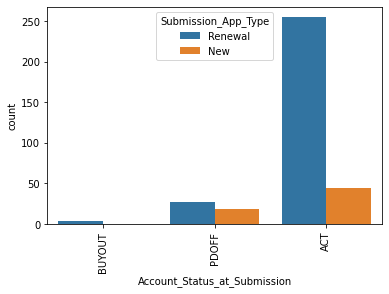

In [1254]:
sns.countplot(x = "Account_Status_at_Submission", hue = "Submission_App_Type", data = RN_filtered)
xticks(rotation = 90)

In [1255]:
#%matplotlib inline
#plt.hist(Lead_NAICS.Lead_Capture_Date, bins=50, color='red', edgecolor='black')
#plt.xticks(rotation = 90)

In [1256]:
duplicate = RN_filtered[RN_filtered.duplicated('Previous Contract Number')]
duplicate

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
24,MC180625040,MC201030027,2020-10-30,MCR000262922,MC180625040,MCR000243147,2020-10-02 15:48:00,Lost status,New,2018-06-27,...,SETT,2018-12-10 16:43:00,PDOFF,2018-12-10 17:26:00,12/5/2018 16:46,PDOFF,1.00,2020-10-01,21.0,661.0
51,MC190212104,MC201006008,2020-10-07,MCR000245592,MC190212104,MCR000242847,2020-10-01 19:14:00,Lost status,New,2019-02-14,...,DEF,2019-09-16 17:20:00,PDOFF,2019-10-03 19:02:00,10/1/2019 18:00,PDOFF,1.00,2020-10-01,11.0,364.0
53,MC190212104,MC201006008,2020-10-07,MCR000245592,MC190212104,MCR000243538,2020-10-05 21:34:00,Lost status,New,2019-02-14,...,DEF,2019-09-16 17:20:00,PDOFF,2019-10-03 19:02:00,10/1/2019 18:00,PDOFF,1.00,2020-10-01,12.0,368.0
117,MC190806089,MC201008100,2020-10-12,MCR000262874,MC190806089,MCR000243466,2020-10-05 18:18:00,Lost status,New,2019-08-07,...,WROFF,2020-02-18 19:09:00,PDOFF,2020-02-18 19:47:00,2/13/2020 18:40,PDOFF,1.00,2020-10-01,7.0,229.0
147,MC190903001,MC210609010,2021-06-09,MCR000268630,MC190903001,MCR000255719,2021-02-19 15:41:00,Lost status,New,2019-09-04,...,ACT,2020-03-12 19:29:00,PDOFF,2020-03-12 19:33:00,3/6/2020 19:09,PDOFF,1.00,2021-06-01,11.0,343.0
184,MC190926294,MC211005006,2021-10-05,MCR000291309,MC190926294,MCR000088608,2020-08-31 07:00:00,Lost status,Renewal,2019-09-30,...,ACT,2020-06-03 18:46:00,PDOFF,2020-06-25 18:43:00,6/23/2020 18:54,PDOFF,1.00,2021-10-01,2.0,66.0
185,MC190926294,MC211005006,2021-10-05,MCR000291309,MC190926294,MCR000256234,2021-02-25 18:51:00,Lost status,Renewal,2019-09-30,...,ACT,2020-06-03 18:46:00,PDOFF,2020-06-25 18:43:00,6/23/2020 18:54,PDOFF,1.00,2021-10-01,8.0,245.0
359,MC191210013,MC201113004,2020-12-11,MCR000258955,MC191210013,MCR000094122,2020-08-18 07:00:00,Lost status,New,2019-12-10,...,PDOFF,2020-10-29 11:17:00,PDOFF,2020-10-29 11:17:00,10/26/2020 10:08,ACT,0.84,2020-12-01,-2.0,-73.0
360,MC191210013,MC210610008,2021-06-10,MCR000270157,MC191210013,MCR000094122,2020-08-18 07:00:00,Lost status,New,2019-12-10,...,ACT,2020-10-29 11:17:00,PDOFF,2020-10-29 11:17:00,10/26/2020 10:08,ACT,0.84,2021-06-01,-2.0,-73.0
361,MC191210013,MC201113004,2020-12-11,MCR000258955,MC191210013,MCR000141047,2020-08-18 07:00:00,Lost status,Renewal,2019-12-10,...,PDOFF,2020-10-29 11:17:00,PDOFF,2020-10-29 11:17:00,10/26/2020 10:08,ACT,0.84,2020-12-01,-2.0,-73.0


In [1257]:
print((RN_filtered.duplicated('Previous Contract Number')).sum())

44


In [1258]:
duplicate1 = RN_filtered[RN_filtered.duplicated('Current Contract Number')]
duplicate1

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
24,MC180625040,MC201030027,2020-10-30,MCR000262922,MC180625040,MCR000243147,2020-10-02 15:48:00,Lost status,New,2018-06-27,...,SETT,2018-12-10 16:43:00,PDOFF,2018-12-10 17:26:00,12/5/2018 16:46,PDOFF,1.00,2020-10-01,21.0,661.0
51,MC190212104,MC201006008,2020-10-07,MCR000245592,MC190212104,MCR000242847,2020-10-01 19:14:00,Lost status,New,2019-02-14,...,DEF,2019-09-16 17:20:00,PDOFF,2019-10-03 19:02:00,10/1/2019 18:00,PDOFF,1.00,2020-10-01,11.0,364.0
53,MC190212104,MC201006008,2020-10-07,MCR000245592,MC190212104,MCR000243538,2020-10-05 21:34:00,Lost status,New,2019-02-14,...,DEF,2019-09-16 17:20:00,PDOFF,2019-10-03 19:02:00,10/1/2019 18:00,PDOFF,1.00,2020-10-01,12.0,368.0
117,MC190806089,MC201008100,2020-10-12,MCR000262874,MC190806089,MCR000243466,2020-10-05 18:18:00,Lost status,New,2019-08-07,...,WROFF,2020-02-18 19:09:00,PDOFF,2020-02-18 19:47:00,2/13/2020 18:40,PDOFF,1.00,2020-10-01,7.0,229.0
147,MC190903001,MC210609010,2021-06-09,MCR000268630,MC190903001,MCR000255719,2021-02-19 15:41:00,Lost status,New,2019-09-04,...,ACT,2020-03-12 19:29:00,PDOFF,2020-03-12 19:33:00,3/6/2020 19:09,PDOFF,1.00,2021-06-01,11.0,343.0
184,MC190926294,MC211005006,2021-10-05,MCR000291309,MC190926294,MCR000088608,2020-08-31 07:00:00,Lost status,Renewal,2019-09-30,...,ACT,2020-06-03 18:46:00,PDOFF,2020-06-25 18:43:00,6/23/2020 18:54,PDOFF,1.00,2021-10-01,2.0,66.0
185,MC190926294,MC211005006,2021-10-05,MCR000291309,MC190926294,MCR000256234,2021-02-25 18:51:00,Lost status,Renewal,2019-09-30,...,ACT,2020-06-03 18:46:00,PDOFF,2020-06-25 18:43:00,6/23/2020 18:54,PDOFF,1.00,2021-10-01,8.0,245.0
360,MC191210013,MC210610008,2021-06-10,MCR000270157,MC191210013,MCR000094122,2020-08-18 07:00:00,Lost status,New,2019-12-10,...,ACT,2020-10-29 11:17:00,PDOFF,2020-10-29 11:17:00,10/26/2020 10:08,ACT,0.84,2021-06-01,-2.0,-73.0
361,MC191210013,MC201113004,2020-12-11,MCR000258955,MC191210013,MCR000141047,2020-08-18 07:00:00,Lost status,Renewal,2019-12-10,...,PDOFF,2020-10-29 11:17:00,PDOFF,2020-10-29 11:17:00,10/26/2020 10:08,ACT,0.84,2020-12-01,-2.0,-73.0
362,MC191210013,MC210610008,2021-06-10,MCR000270157,MC191210013,MCR000141047,2020-08-18 07:00:00,Lost status,Renewal,2019-12-10,...,ACT,2020-10-29 11:17:00,PDOFF,2020-10-29 11:17:00,10/26/2020 10:08,ACT,0.84,2021-06-01,-2.0,-73.0


In [1259]:
print((RN_filtered.duplicated('Current Contract Number')).sum())

42


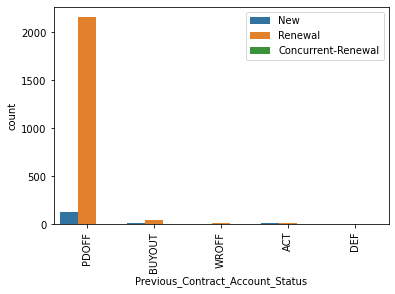

In [1260]:
sns.countplot(x = "Previous_Contract_Account_Status", hue = "Submission_App_Type", data = Renewal_df)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [1261]:
Ren_mask = (Renewal_df.Previous_Contract_Account_Status == "PDOFF") | (Renewal_df.Previous_Contract_Account_Status == "BUYOUT") 

RN_filtered1= Renewal_df[Ren_mask]
RN_filtered1

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
0,MC150811041,MC210324094,2021-03-26,MCR000263365,MC150811041,MCR000263365,2021-03-24 00:00:00,Funded MCR Number,New,2015-08-17,...,PDOFF,2016-02-23 16:52:00,PDOFF,2016-02-23 16:53:00,NaN,PDOFF,1.00,2021-03-01,61.0,1855.0
1,MC160816002,MC210318069,2021-03-23,MCR000263286,MC160816002,MCR000263286,2021-03-18 00:00:00,Funded MCR Number,New,2016-09-02,...,ACT,2017-04-10 16:48:00,PDOFF,2017-04-10 16:50:00,NaN,PDOFF,1.00,2021-03-01,47.0,1437.0
2,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000281332,2021-08-10 17:59:00,Lost status,Renewal,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.00,2021-09-01,54.0,1643.0
3,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000290203,2021-09-27 14:26:00,Funded MCR Number,New,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.00,2021-09-01,55.0,1690.0
4,MC161122058,MC200713136,2020-07-15,MCR000056008,MC161122058,MCR000056008,2020-07-13 00:00:00,Funded MCR Number,New,2016-11-28,...,PDOFF,2017-07-26 11:26:00,BUYOUT,2017-07-20 11:06:00,NaN,BUYOUT,1.00,2020-07-01,35.0,1088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,MC210727022,MC211008021,2021-10-08,MCR000292345,MC210727022,MCR000292345,2021-10-07 21:23:00,Funded MCR Number,Renewal,2021-07-27,...,ACT,NaT,PDOFF,2021-10-07 18:59:00,10/5/2021 18:15,ACT,0.40,2021-10-01,0.0,0.0
2356,MC210727022,MC211008021,2021-10-08,MCR000292345,MC210727022,MCR000278609,2021-07-27 14:49:00,Lost status,New,2021-07-27,...,ACT,NaT,PDOFF,2021-10-07 18:59:00,10/5/2021 18:15,ACT,0.00,2021-10-01,-2.0,-73.0
2357,MC210728014,MC211005001,2021-10-05,MCR000290200,MC210728014,MCR000290200,2021-09-27 14:24:00,Funded MCR Number,Renewal,2021-07-28,...,ACT,NaT,PDOFF,2021-10-04 18:48:00,9/30/2021 18:41,ACT,0.33,2021-10-01,0.0,-8.0
2358,MC210728014,MC211005001,2021-10-05,MCR000290200,MC210728014,MCR000291107,2021-10-01 14:31:00,Lost status,Renewal,2021-07-28,...,ACT,NaT,PDOFF,2021-10-04 18:48:00,9/30/2021 18:41,ACT,0.37,2021-10-01,0.0,-4.0


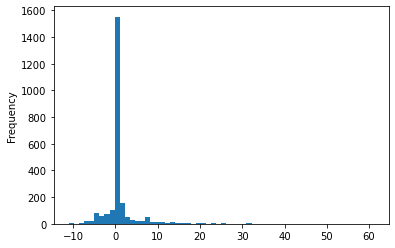

In [1262]:
ax = RN_filtered1['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

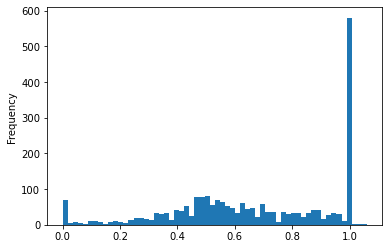

In [1263]:
ax = RN_filtered1['Paid_at_Submission'].plot.hist(bins=60)

In [1264]:
Ren_mask = (RN_filtered1.Month_Funded_to_Last_Activity >= 6)
RN_filtered9= RN_filtered1[Ren_mask]
RN_filtered9

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
0,MC150811041,MC210324094,2021-03-26,MCR000263365,MC150811041,MCR000263365,2021-03-24 00:00:00,Funded MCR Number,New,2015-08-17,...,PDOFF,2016-02-23 16:52:00,PDOFF,2016-02-23 16:53:00,NaN,PDOFF,1.0,2021-03-01,61.0,1855.0
1,MC160816002,MC210318069,2021-03-23,MCR000263286,MC160816002,MCR000263286,2021-03-18 00:00:00,Funded MCR Number,New,2016-09-02,...,ACT,2017-04-10 16:48:00,PDOFF,2017-04-10 16:50:00,NaN,PDOFF,1.0,2021-03-01,47.0,1437.0
2,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000281332,2021-08-10 17:59:00,Lost status,Renewal,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.0,2021-09-01,54.0,1643.0
3,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000290203,2021-09-27 14:26:00,Funded MCR Number,New,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.0,2021-09-01,55.0,1690.0
4,MC161122058,MC200713136,2020-07-15,MCR000056008,MC161122058,MCR000056008,2020-07-13 00:00:00,Funded MCR Number,New,2016-11-28,...,PDOFF,2017-07-26 11:26:00,BUYOUT,2017-07-20 11:06:00,NaN,BUYOUT,1.0,2020-07-01,35.0,1088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,MC200406085,MC210716021,2021-07-16,MCR000276555,MC200406085,MCR000276555,2021-07-15 16:53:00,Funded MCR Number,Renewal,2020-04-06,...,ACT,2020-12-04 19:31:00,PDOFF,2020-12-04 19:33:00,12/1/2020 18:57,PDOFF,1.0,2021-07-01,7.0,222.0
820,MC200408190,MC210825007,2021-08-25,MCR000283690,MC200408190,MCR000283690,2021-08-23 17:50:00,Funded MCR Number,Renewal,2020-04-09,...,ACT,2021-02-09 17:44:00,PDOFF,2021-02-09 17:45:00,2/4/2021 17:31,PDOFF,1.0,2021-08-01,6.0,195.0
928,MC200521121,MC210602018,2021-06-02,MCR000268009,MC200521121,MCR000268009,2021-05-27 13:54:00,Funded MCR Number,New,2020-05-22,...,ACT,2020-09-21 19:08:00,PDOFF,2020-09-21 19:18:00,9/16/2020 18:53,PDOFF,1.0,2021-06-01,8.0,247.0
1060,MC200625138,MC210617017,2021-06-17,MCR000270803,MC200625138,MCR000270803,2021-06-14 14:54:00,Funded MCR Number,Renewal,2020-06-30,...,ACT,2020-11-16 19:04:00,PDOFF,2020-11-16 19:31:00,11/10/2020 18:46,PDOFF,1.0,2021-06-01,6.0,209.0


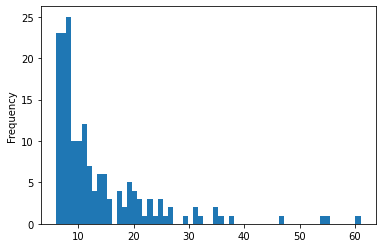

In [1265]:
ax = RN_filtered9['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

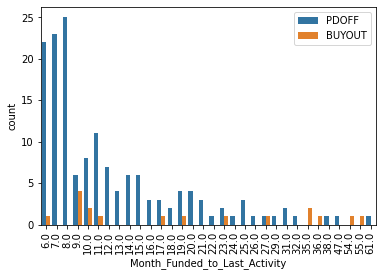

In [1266]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Account_Status_at_Submission", data = RN_filtered9)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [1267]:
Ren_mask = (RN_filtered1.Month_Funded_to_Last_Activity < 6)
RN_filtered10= RN_filtered1[Ren_mask]
RN_filtered10

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
16,MC180109221,MC201005001,2020-10-08,MCR000263188,MC180109221,MCR000263188,2020-10-05 00:00:00,Funded MCR Number,Renewal,2018-01-12,...,PDOFF,2020-08-13 09:07:00,PDOFF,2020-08-13 09:07:00,8/13/2020 9:07,PDOFF,1.00,2020-10-01,1.0,52.0
58,MC190318136,MC200805002,2020-08-06,MCR000056064,MC190318136,MCR000056064,2020-08-05 00:00:00,Funded MCR Number,Renewal,2019-03-20,...,DEF,2020-03-20 18:41:00,PDOFF,2020-03-20 18:41:00,3/17/2020 18:42,PDOFF,1.00,2020-08-01,4.0,137.0
61,MC190326194,MC200622089,2020-06-25,MCR000056366,MC190326194,MCR000056366,2020-06-22 00:00:00,Funded MCR Number,Renewal,2019-03-28,...,PDOFF,2020-01-29 19:10:00,PDOFF,2020-01-29 19:10:00,1/24/2020 18:49,PDOFF,1.00,2020-06-01,4.0,144.0
66,MC190423227,MC200625001,2020-06-30,MCR000056045,MC190423227,MCR000056045,2020-06-25 00:00:00,Funded MCR Number,Renewal,2019-06-13,...,PDOFF,2020-06-23 18:54:00,PDOFF,2020-06-23 18:54:00,6/18/2020 18:41,PDOFF,1.00,2020-06-01,0.0,1.0
68,MC190501116,MC200616089,2020-06-19,MCR000056359,MC190501116,MCR000056359,2020-06-16 00:00:00,Funded MCR Number,Renewal,2019-05-23,...,PDOFF,2020-03-26 18:47:00,PDOFF,2020-03-26 18:47:00,3/23/2020 18:40,PDOFF,1.00,2020-06-01,2.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,MC210727022,MC211008021,2021-10-08,MCR000292345,MC210727022,MCR000292345,2021-10-07 21:23:00,Funded MCR Number,Renewal,2021-07-27,...,ACT,NaT,PDOFF,2021-10-07 18:59:00,10/5/2021 18:15,ACT,0.40,2021-10-01,0.0,0.0
2356,MC210727022,MC211008021,2021-10-08,MCR000292345,MC210727022,MCR000278609,2021-07-27 14:49:00,Lost status,New,2021-07-27,...,ACT,NaT,PDOFF,2021-10-07 18:59:00,10/5/2021 18:15,ACT,0.00,2021-10-01,-2.0,-73.0
2357,MC210728014,MC211005001,2021-10-05,MCR000290200,MC210728014,MCR000290200,2021-09-27 14:24:00,Funded MCR Number,Renewal,2021-07-28,...,ACT,NaT,PDOFF,2021-10-04 18:48:00,9/30/2021 18:41,ACT,0.33,2021-10-01,0.0,-8.0
2358,MC210728014,MC211005001,2021-10-05,MCR000290200,MC210728014,MCR000291107,2021-10-01 14:31:00,Lost status,Renewal,2021-07-28,...,ACT,NaT,PDOFF,2021-10-04 18:48:00,9/30/2021 18:41,ACT,0.37,2021-10-01,0.0,-4.0


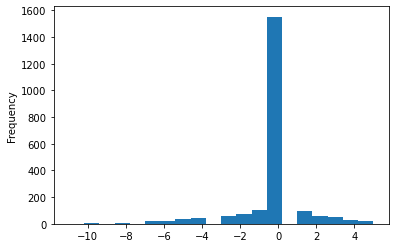

In [1268]:
ax = RN_filtered10['Month_Funded_to_Last_Activity'].plot.hist(bins=20)

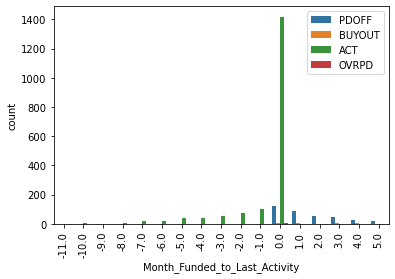

In [1269]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Account_Status_at_Submission", data = RN_filtered10)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [1270]:
Ren_Count_Data4 = RN_filtered1.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data4

,Month_Funded_to_Last_Activity,Count
0,-11.0,1
1,-10.0,3
2,-9.0,2
3,-8.0,7
4,-7.0,18
5,-6.0,18
6,-5.0,37
7,-4.0,42
8,-3.0,55
9,-2.0,72


In [1271]:
percentage = []
total_count = Ren_Count_Data4.Count.sum()

for i in range(Ren_Count_Data4.shape[0]):
    pct = (Ren_Count_Data3.Count[i] / total_count) * 100
    percentage.append(round(pct, 2))
 
# display percentage
print(percentage)
 
# display data
Ren_Count_Data4['Percentage'] = percentage
Ren_Count_Data4

[3.42, 0.09, 0.04, 0.04, 0.09, 0.04, 0.04, 0.04, 0.04, 0.04, 0.13, 0.09, 0.04, 0.21, 0.13, 0.21, 0.17, 0.13, 0.09, 0.09, 0.21, 0.13, 0.13, 0.13, 0.09, 0.13, 0.13, 0.09, 0.13, 0.21, 0.13, 0.26, 0.21, 0.21, 0.17, 0.21, 0.3, 0.43, 0.21, 0.09, 0.34, 0.17, 0.17, 0.09, 0.13, 0.21, 0.13, 0.17, 0.04]


,Month_Funded_to_Last_Activity,Count,Percentage
0,-11.0,1,3.42
1,-10.0,3,0.09
2,-9.0,2,0.04
3,-8.0,7,0.04
4,-7.0,18,0.09
5,-6.0,18,0.04
6,-5.0,37,0.04
7,-4.0,42,0.04
8,-3.0,55,0.04
9,-2.0,72,0.04


In [1272]:
df2 = Ren_Count_Data4.groupby('Count').sum().sort_values("Month_Funded_to_Last_Activity", ascending=True)
df2 = df2.reset_index()
df2

,Count,Month_Funded_to_Last_Activity,Percentage
0,18,-13.0,0.13
1,37,-5.0,0.04
2,42,-4.0,0.04
3,55,-3.0,0.04
4,72,-2.0,0.04
5,101,-1.0,0.13
6,1552,0.0,0.09
7,96,1.0,0.04
8,59,2.0,0.21
9,52,3.0,0.13


In [1273]:
df3 = df2.groupby('Month_Funded_to_Last_Activity').sum().sort_values("Percentage", ascending=False)
df3 = df3.reset_index()
df3

,Month_Funded_to_Last_Activity,Count,Percentage
0,413.0,1,5.30
1,102.0,2,0.97
2,75.0,3,0.86
3,50.0,4,0.48
4,19.0,15,0.47
5,4.0,34,0.38
6,29.0,6,0.26
7,13.0,23,0.22
8,2.0,59,0.21
9,5.0,24,0.17


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '-13.0'),
  Text(1, 0, '-5.0'),
  Text(2, 0, '-4.0'),
  Text(3, 0, '-3.0'),
  Text(4, 0, '-2.0'),
  Text(5, 0, '-1.0'),
  Text(6, 0, '0.0'),
  Text(7, 0, '1.0'),
  Text(8, 0, '2.0'),
  Text(9, 0, '3.0'),
  Text(10, 0, '4.0'),
  Text(11, 0, '5.0'),
  Text(12, 0, '8.0'),
  Text(13, 0, '11.0'),
  Text(14, 0, '13.0'),
  Text(15, 0, '19.0'),
  Text(16, 0, '29.0'),
  Text(17, 0, '50.0'),
  Text(18, 0, '75.0'),
  Text(19, 0, '102.0'),
  Text(20, 0, '413.0')])

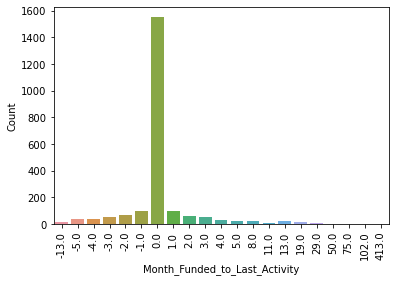

In [1192]:
ax = sns.barplot(x="Month_Funded_to_Last_Activity", y="Count",  data=df3)
plt.xticks(rotation=90)

In [1191]:
#x= df3['Count']
#y= df3['Month_Funded_to_Last_Activity']

#plt.figure(figsize=(10,8))
#data = df3.iloc[:,[0,2]]
#data.columns = ['Month_Funded_to_Last_Activity', 'Count']
#clrs = ['gray' if (x > 0.2) else 'red' for x in df3['Percentage']]
#ax = sns.barplot(x,y, data=df3, orient = 'h', palette=clrs)
#ax.set_xlabel('Count',fontsize=12)
#ax.set_ylabel('Month_Funded_to_Last_Activity',fontsize=12)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)

#for i, v in enumerate(df3['Percentage']):
    #ax.text(v + 0, i + 0.15, str("{0:.2f}%".format(v)), color='black', fontweight='bold', fontsize=12)

In [991]:
Ren_mask = (Renewal_df.Current_Contract_Account_Status == "PDOFF") | (Renewal_df.Current_Contract_Account_Status == "BUYOUT") 

RN_filtered7= Renewal_df[Ren_mask]
RN_filtered7

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
0,MC150811041,MC210324094,2021-03-26,MCR000263365,MC150811041,MCR000263365,2021-03-24 00:00:00,Funded MCR Number,New,2015-08-17,...,PDOFF,2016-02-23 16:52:00,PDOFF,2016-02-23 16:53:00,NaN,PDOFF,1.00,2021-03-01,61.0,1855.0
4,MC161122058,MC200713136,2020-07-15,MCR000056008,MC161122058,MCR000056008,2020-07-13 00:00:00,Funded MCR Number,New,2016-11-28,...,PDOFF,2017-07-26 11:26:00,BUYOUT,2017-07-20 11:06:00,NaN,BUYOUT,1.00,2020-07-01,35.0,1088.0
5,MC170118024,MC200817109,2020-08-31,MCR000141027,MC170118024,MCR000141027,2020-08-17 00:00:00,Funded MCR Number,Renewal,2017-01-23,...,PDOFF,2017-11-21 16:52:00,PDOFF,2017-11-21 16:52:00,NaN,PDOFF,1.00,2020-08-01,32.0,999.0
7,MC170801077,MC200626003,2020-06-29,MCR000156680,MC170801077,MCR000156680,2020-06-24 07:00:00,Funded MCR Number,New,2017-08-04,...,PDOFF,2018-08-08 16:49:00,PDOFF,2018-08-08 16:49:00,8/3/2018 16:55,PDOFF,1.00,2020-06-01,22.0,685.0
11,MC171016071,MC201216216,2020-12-22,MCR000262893,MC171016071,MCR000262893,2020-12-16 00:00:00,Funded MCR Number,Renewal,2017-10-19,...,BUYOUT,2018-01-16 09:32:00,BUYOUT,2018-01-16 09:32:00,NaN,BUYOUT,1.00,2020-12-01,35.0,1064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,MC210301160,MC210427029,2021-04-27,MCR000263976,MC210301160,MCR000263976,2021-04-26 16:27:00,Funded MCR Number,Renewal,2021-03-02,...,PDOFF,NaT,PDOFF,2021-04-26 18:50:00,4/22/2021 18:34,ACT,0.23,2021-04-01,0.0,-1.0
2160,MC210305064,MC210624013,2021-06-24,MCR000272800,MC210305064,MCR000272800,2021-06-23 17:35:00,Funded MCR Number,Renewal,2021-03-05,...,PDOFF,NaT,PDOFF,2021-06-23 18:48:00,6/21/2021 18:43,ACT,0.41,2021-06-01,0.0,-1.0
2187,MC210322132,MC210611003,2021-06-11,MCR000270378,MC210322132,MCR000270378,2021-06-10 18:47:00,Funded MCR Number,Renewal,2021-03-23,...,PDOFF,NaT,PDOFF,2021-06-10 19:34:00,6/8/2021 18:41,ACT,0.44,2021-06-01,0.0,-1.0
2220,MC210408089,MC210616026,2021-06-16,MCR000271314,MC210408089,MCR000271314,2021-06-15 20:03:00,Funded MCR Number,Renewal,2021-04-16,...,BUYOUT,NaT,PDOFF,2021-06-15 18:49:00,6/11/2021 18:43,ACT,0.33,2021-06-01,0.0,0.0


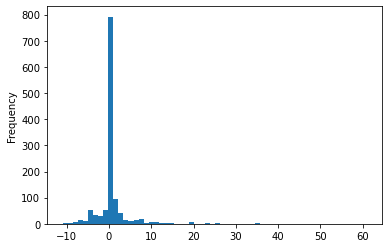

In [992]:
ax = RN_filtered7['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

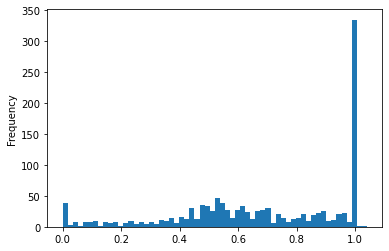

In [993]:
ax = RN_filtered7['Paid_at_Submission'].plot.hist(bins=60)

In [994]:
Ren_mask = (Renewal_df.Account_Status_at_Submission == "PDOFF") | (Renewal_df.Account_Status_at_Submission == "BUYOUT") | (Renewal_df.Account_Status_at_Submission == "OVRPD")

RN_filtered6= Renewal_df[Ren_mask]
RN_filtered6

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
0,MC150811041,MC210324094,2021-03-26,MCR000263365,MC150811041,MCR000263365,2021-03-24 00:00:00,Funded MCR Number,New,2015-08-17,...,PDOFF,2016-02-23 16:52:00,PDOFF,2016-02-23 16:53:00,NaN,PDOFF,1.0,2021-03-01,61.0,1855.0
1,MC160816002,MC210318069,2021-03-23,MCR000263286,MC160816002,MCR000263286,2021-03-18 00:00:00,Funded MCR Number,New,2016-09-02,...,ACT,2017-04-10 16:48:00,PDOFF,2017-04-10 16:50:00,NaN,PDOFF,1.0,2021-03-01,47.0,1437.0
2,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000281332,2021-08-10 17:59:00,Lost status,Renewal,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.0,2021-09-01,54.0,1643.0
3,MC160919082,MC210929005,2021-09-29,MCR000290203,MC160919082,MCR000290203,2021-09-27 14:26:00,Funded MCR Number,New,2016-10-12,...,ACT,2017-02-09 16:04:00,BUYOUT,2017-02-09 16:04:00,NaN,BUYOUT,1.0,2021-09-01,55.0,1690.0
4,MC161122058,MC200713136,2020-07-15,MCR000056008,MC161122058,MCR000056008,2020-07-13 00:00:00,Funded MCR Number,New,2016-11-28,...,PDOFF,2017-07-26 11:26:00,BUYOUT,2017-07-20 11:06:00,NaN,BUYOUT,1.0,2020-07-01,35.0,1088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,MC210310143,MC211005007,2021-10-05,MCR000291403,MC210310143,MCR000291403,2021-10-04 16:55:00,Funded MCR Number,Renewal,2021-03-10,...,ACT,2021-08-02 18:37:00,PDOFF,2021-08-02 19:02:00,7/28/2021 18:39,PDOFF,1.0,2021-10-01,2.0,62.0
2229,MC210413095,MC210729016,2021-07-29,MCR000279019,MC210413095,MCR000279019,2021-07-28 20:09:00,Funded MCR Number,Renewal,2021-04-13,...,ACT,2021-06-08 17:22:00,BUYOUT,2021-06-08 17:22:00,6/3/2021 18:34,BUYOUT,1.0,2021-07-01,1.0,50.0
2252,MC210427007,MC210728003,2021-07-28,MCR000278681,MC210427007,MCR000278681,2021-07-27 17:17:00,Funded MCR Number,Renewal,2021-04-27,...,ACT,2021-07-27 17:16:00,BUYOUT,2021-07-27 17:16:00,7/22/2021 18:36,BUYOUT,1.0,2021-07-01,0.0,0.0
2282,MC210505140,MC210729018,2021-07-29,MCR000277799,MC210505140,MCR000277799,2021-07-22 14:07:00,Funded MCR Number,Renewal,2021-05-06,...,ACT,2021-07-14 10:03:00,BUYOUT,2021-07-14 10:03:00,7/2/2021 18:32,BUYOUT,1.0,2021-07-01,0.0,8.0


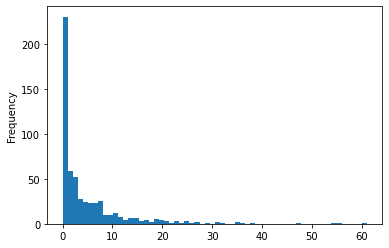

In [995]:
ax = RN_filtered6['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [997]:
Ren_mask = (Renewal_df.Account_Status_at_Submission == "ACT") 
RN_filtered8= Renewal_df[Ren_mask]
RN_filtered8

,cs_app_no,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Submission_App_Type,Previous Funded Date,...,Current_Contract_Account_Status,Previous Contract Last Payment Date,Previous_Contract_Account_Status,Previous Contract Last Activity,Previous Contract Lasy Cleared Payment,Account_Status_at_Submission,Paid_at_Submission,Funded Vintage,Month_Funded_to_Last_Activity,Difference
95,MC190711105,MC200720106,2020-07-24,MCR000187724,MC190711105,MCR000187724,2020-07-20 00:00:00,Funded MCR Number,Renewal,2019-07-12,...,PDOFF,NaT,PDOFF,2020-07-23 19:17:00,7/21/2020 18:41,ACT,0.96,2020-07-01,0.0,-4.0
106,MC190731205,MC200813107,2020-09-01,MCR000056079,MC190731205,MCR000056079,2020-08-13 00:00:00,Funded MCR Number,Renewal,2019-08-05,...,PDOFF,NaT,PDOFF,2020-08-31 19:05:00,8/27/2020 18:40,ACT,0.93,2020-09-01,0.0,-19.0
112,MC190805189,MC201117014,2020-11-20,MCR000259227,MC190805189,MCR000259227,2020-11-16 00:00:00,Funded MCR Number,Renewal,2019-09-30,...,PDOFF,NaT,PDOFF,2020-11-20 09:46:00,11/17/2020 9:48,ACT,0.94,2020-11-01,0.0,-5.0
113,MC190805189,MC201117014,2020-11-20,MCR000259227,MC190805189,MCR000141644,2020-08-06 07:00:00,Lost status,Renewal,2019-09-30,...,PDOFF,NaT,PDOFF,2020-11-20 09:46:00,11/17/2020 9:48,ACT,0.66,2020-11-01,-3.0,-107.0
122,MC190809167,MC200506130,2020-05-07,MCR000219943,MC190809167,MCR000219943,2020-05-06 07:00:00,Funded MCR Number,Renewal,2019-08-13,...,PDOFF,NaT,PDOFF,2020-05-06 18:38:00,5/4/2020 18:40,ACT,0.97,2020-05-01,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,MC210729014,MC211008002,2021-10-08,MCR000292156,MC210729014,MCR000292156,2021-10-07 13:57:00,Funded MCR Number,Renewal,2021-07-29,...,ACT,NaT,PDOFF,2021-10-07 19:00:00,10/5/2021 18:15,ACT,0.39,2021-10-01,0.0,-1.0
2360,MC210806020,MC210811023,2021-08-11,MCR000281528,MC210806020,MCR000280723,2021-08-06 15:01:00,Lost status,New,2021-08-06,...,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:02:00,10/6/2021 18:36,ACT,0.00,2021-08-01,-2.0,-64.0
2361,MC210813011,MC211007015,2021-10-07,MCR000292070,MC210813011,MCR000291024,2021-09-30 20:12:00,Lost status,New,2021-08-13,...,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:03:00,10/6/2021 18:36,ACT,0.26,2021-10-01,0.0,-8.0
2362,MC210831018,MC210909007,2021-09-09,MCR000286708,MC210831018,MCR000285274,2021-08-31 15:23:00,Lost status,Renewal,2021-08-31,...,ACT,2021-10-08 18:47:00,ACT,2021-10-08 19:06:00,10/6/2021 18:36,ACT,0.00,2021-09-01,-1.0,-39.0


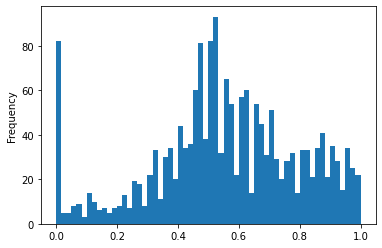

In [998]:
ax = RN_filtered8['Paid_at_Submission'].plot.hist(bins=60)

In [999]:
Ren_Count_Data8 = RN_filtered8.groupby('Paid_at_Submission').size().reset_index(name='Count')
Ren_Count_Data8

,Paid_at_Submission,Count
0,0.00,80
1,0.01,2
2,0.02,3
3,0.03,2
4,0.04,5
...,...,...
96,0.96,17
97,0.97,13
98,0.98,12
99,0.99,11


In [449]:
#print(Lead_filtered['LTTest_Naics'].unique())